In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from warnings import simplefilter 
simplefilter(action='ignore',category=FutureWarning)

sns.set(style='white', context='notebook', palette='deep')

In [22]:
dataset = pd.read_csv("new1.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
education.num     0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [23]:
#dataset = dataset.fillna(np.nan)

In [24]:
dataset.head(4)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,9,Female,0,4356,40,<=50K
1,82,9,Female,0,4356,18,<=50K
2,66,10,Female,0,4356,40,<=50K
3,54,4,Female,0,3900,40,<=50K


In [25]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(50)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,9,Female,0,4356,40,0
1,82,9,Female,0,4356,18,0
2,66,10,Female,0,4356,40,0
3,54,4,Female,0,3900,40,0
4,41,10,Female,0,3900,40,0
5,34,9,Female,0,3770,45,0
6,38,6,Male,0,3770,40,0
7,74,16,Female,0,3683,20,1
8,68,9,Female,0,3683,40,0
9,41,10,Male,0,3004,60,1


/home/cslab3pc25/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/cslab3pc25/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


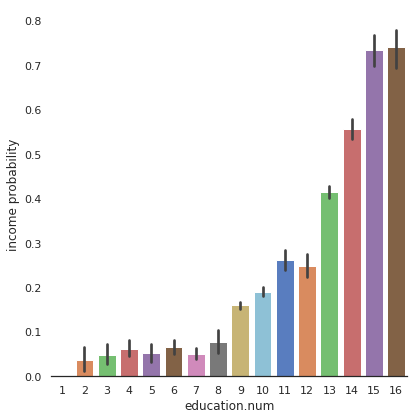

In [26]:
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("income probability")

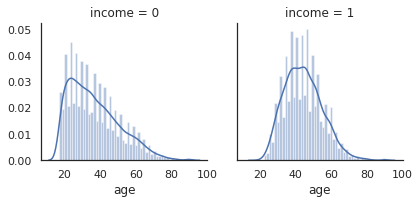

In [27]:
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")
plt.show()

In [28]:
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

In [29]:
dataset.head(50)

,age,education.num,sex,capital.gain,capital.loss,hours.per.week,income
0,90,9,1,0,4356,40,0
1,82,9,1,0,4356,18,0
2,66,10,1,0,4356,40,0
3,54,4,1,0,3900,40,0
4,41,10,1,0,3900,40,0
5,34,9,1,0,3770,45,0
6,38,6,0,0,3770,40,0
7,74,16,1,0,3683,20,1
8,68,9,1,0,3683,40,0
9,41,10,0,0,3004,60,1


In [30]:
# Split-out Validation Dataset and Create Test Variables
array = dataset.values
X = array[:,0:6]
Y = array[:,6]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

Split Data: X
[[  90    9    1    0 4356   40]
 [  82    9    1    0 4356   18]
 [  66   10    1    0 4356   40]
 ...
 [  40    9    0    0    0   40]
 [  58    9    1    0    0   40]
 [  22    9    0    0    0   20]]
Split Data: Y
[0 0 0 ... 1 0 0]


In [ ]:
# Params for Random Forest
num_trees = 30
max_features = 2

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.822674 (0.005651)
LDA: 0.810197 (0.006700)


In [20]:
naming=['AGE','EDUCATION.NO' ,'SEX','CAPITAL.GAIN','CAPITAL.LOSS','HOURS.PER.WEEK']
B=[]
print("ENTER VALUE FOR\n")
for i in naming:
  print(i)
  B.append(input()) 
X_value=np.reshape(B,(1, -1)) 
getresult=DecisionTreeClassifier()
getresult.fit(X_train,Y_train)
predictions=getresult.predict(X_value)
print("INCOME:\r")
print(predictions[0])

ENTER VALUE FOR

AGE
90
EDUCATION.NO
9
SEX
1
CAPITAL.GAIN
0
CAPITAL.LOSS
4356
HOURS.PER.WEEK
40
INCOME:
0
